# Analisando as notas em geral

In [41]:
import pandas as pd

notas = pd.read_csv('C:\Estudos\DataScience_Alura\introducao-a-data-science-aula0\Aula0\ml-latest-small\Ratings.csv')
notas.dropna().head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [42]:
notas.shape

(100836, 4)

In [43]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [44]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [45]:
print('Média:',notas['nota'].mean())
print('Mediana:',notas['nota'].median())


Média: 3.501556983616962
Mediana: 3.5


In [46]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

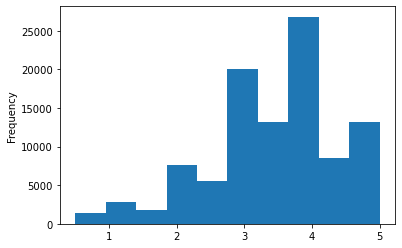

In [47]:
notas.nota.plot(kind='hist')

In [48]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

C:\Users\estev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

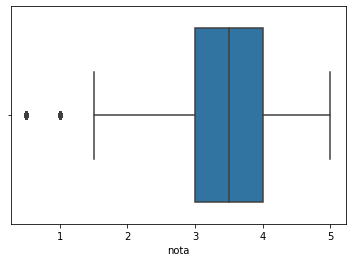

In [49]:
import seaborn as sns

sns.boxplot(notas['nota'])

# Olhando os filmes

In [50]:
filmes = pd.read_csv('C:\Estudos\DataScience_Alura\introducao-a-data-science-aula0\Aula0\ml-latest-small\Movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filme

In [51]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [52]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [53]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

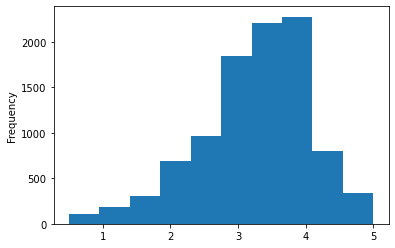

In [54]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:ylabel='nota'>

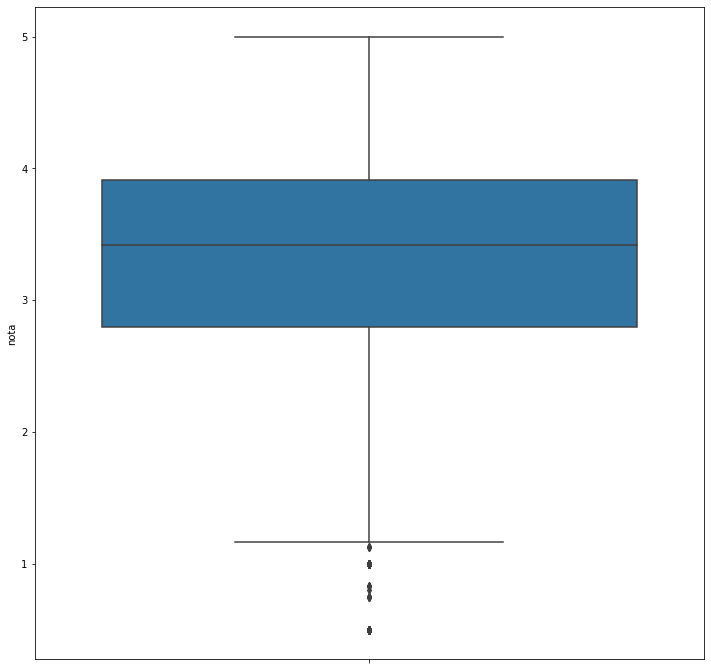

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.boxplot(y=medias_por_filme)

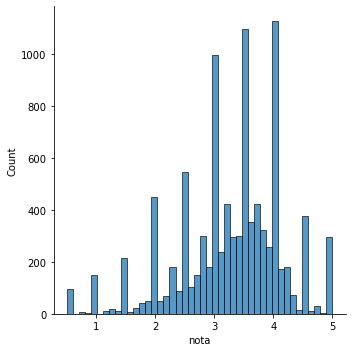

In [56]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

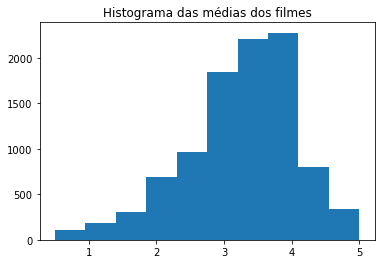

In [57]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

# Analisando os filmes TMDB

In [58]:
tmdb = pd.read_csv('C:\Estudos\DataScience_Alura\Archive\Tmdb_5000_movies.csv')
tmdb.dropna().head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [59]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [60]:
# 1º grau
# 2º grau
# 3º grau
# 1º grau < 2º grau < 3º grau # categorica ordinal

In [61]:
# budget => orçamento => variavel quantitativa continuo

# quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos

In [62]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

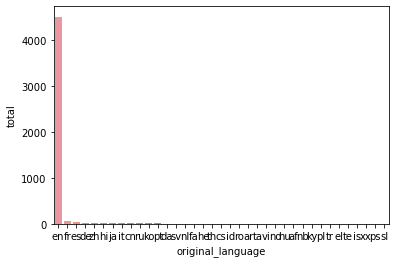

In [63]:
sns.barplot(x='original_language', y='total',data=contagem_de_lingua)

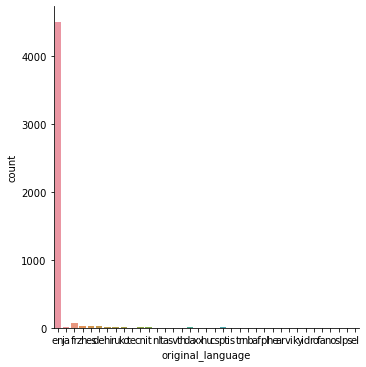

In [64]:
sns.catplot(x='original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x1726bfb57c0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text(

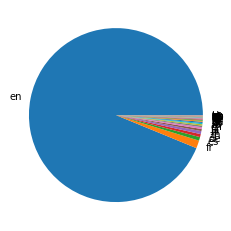

In [65]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

In [66]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [67]:
# dicionario em Python

dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

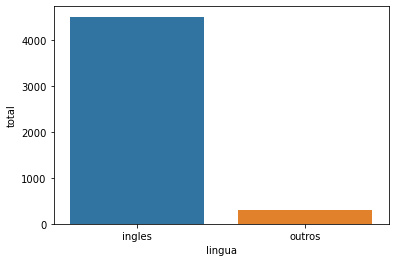

In [68]:
sns.barplot(x='lingua', y='total', data = dados)

([<matplotlib.patches.Wedge at 0x1726c120040>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

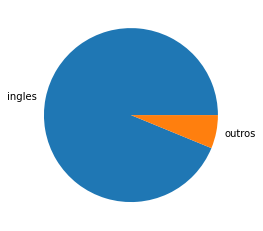

In [69]:
plt.pie(dados['total'], labels = dados['lingua'])

In [70]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ta     2
ro     2
cs     2
id     2
ar     2
nb     1
af     1
pl     1
tr     1
no     1
ky     1
el     1
is     1
xx     1
te     1
ps     1
sl     1
vi     1
hu     1
Name: original_language, dtype: int64

<Figure size 360x720 with 0 Axes>

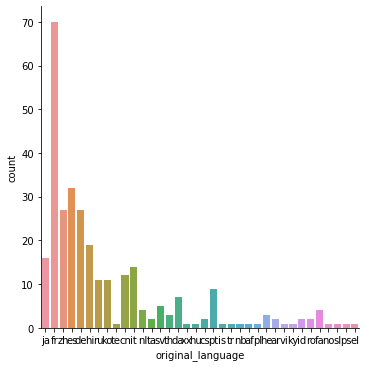

In [71]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

plt.figure(figsize=(5,10)) 
""" Nesse caso o catplot vai ignorar a linha acima porque ele está usando um gráfico de alto nível,
    ou seja, não foi feito o gráfico a mão, então teria que usar um tipo de declaração dentro da própria
    variável sns.catplot() para que possa mudar e personalizar o gráfico.
"""
sns.catplot(x="original_language", kind="count",
            data = filmes_sem_lingua_original_em_ingles) # Duplicando o tamanho, o aspecto

<Figure size 360x720 with 0 Axes>

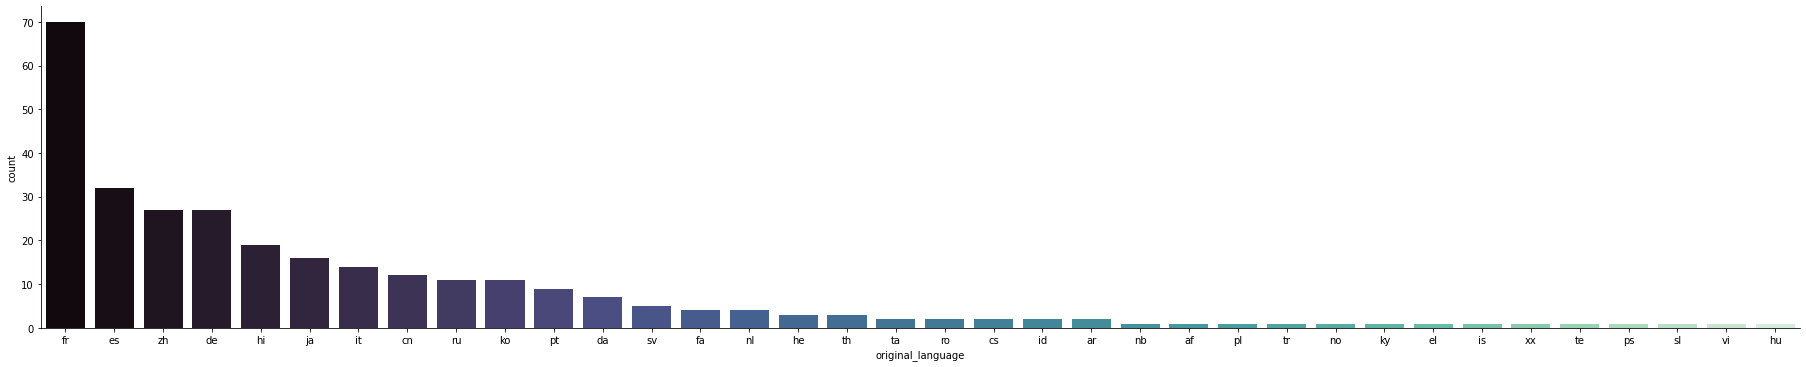

In [72]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

plt.figure(figsize=(5,10)) 
""" Nesse caso o catplot vai ignorar a linha acima porque ele está usando um gráfico de alto nível,
    ou seja, não foi feito o gráfico a mão, então teria que usar um tipo de declaração dentro da própria
    variável sns.catplot() para que possa mudar e personalizar o gráfico.
"""
sns.catplot(x="original_language", kind="count",
            data = filmes_sem_lingua_original_em_ingles,
            aspect=5,
            palette='mako',
            order=total_por_lingua_de_outros_filmes.index) # Duplicando o tamanho, o aspecto

In [73]:
# Poderia ser usado o gráfico sns.lmplot() para esse exemplo, que também é de excelente visualização

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, boxplot, histograma

In [74]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [75]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [80]:
print('Nota média do Toy Story %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [112]:
print('Nota média do Toy Story %.2f' % notas_do_toy_story.nota.mean())
print('Nota média do Jumanji %.2f' % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [87]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [115]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

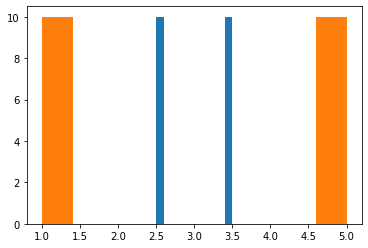

In [96]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1726c472310>,
 'caps': [<matplotlib.lines.Line2D at 0x1726c4729d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1726c47ff40>,
 'medians': [<matplotlib.lines.Line2D at 0x1726c48b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1726c48b430>,
 'means': []}

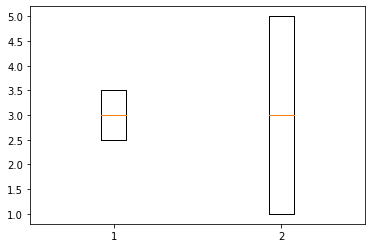

In [99]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x1726cbae1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1726cbae8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1726cba1e20>,
 'medians': [<matplotlib.lines.Line2D at 0x1726cbaef70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1726cbb8310>,
 'means': []}

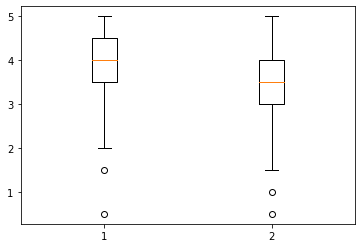

In [104]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

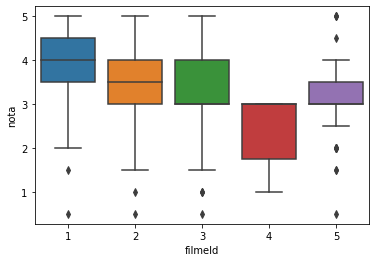

In [108]:
sns.boxplot(x = 'filmeId', y= 'nota', data = notas.query('filmeId in [1,2,3,4,5]'))

In [114]:
print('Desvio Padrão do Filme Toy Story: %.3f' % notas_do_toy_story.nota.std())
print('Desvio Padrão do Filme Jumanji: %.3f' % notas_do_jumanji.nota.std())


Desvio Padrão do Filme Toy Story: 0.835
Desvio Padrão do Filme Jumanji: 0.882


In [ ]:
()